<a href="https://colab.research.google.com/github/lphuong304/CS116.M11/blob/main/Practice%20In%20Class/BaiTap3/19520227_BT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><strong>BÀI TẬP  - 28/09/2021</strong></h1>
<h1 align="center"><strong>LẬP TRÌNH PYTHON CHO MÁY HỌC CS116.M11 - PHÂN TÍCH KHU VỰC QUAN TÂM CỦA NGƯỜI DÙNG TỚI HẠN</strong></h1>




# GIỚI THIỆU:

1. Họ và tên: Nguyễn Ngọc Lan Phương
2. MSSV: 19520227 - KHMT2019
3. Lớp: CS116.M11
4. Bài tập: Phân tích khu vực quan tâm của người dùng tới hạn
5. Ngày thực hiện: 28/09/2021



#get dữ liệu

In [1]:
!git clone https://github.com/CityScope/CSL_HCMC.git

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 1930 (delta 309), reused 500 (delta 270), pack-reused 1340
Receiving objects: 100% (1930/1930), 178.53 MiB | 24.42 MiB/s, done.
Resolving deltas: 100% (986/986), done.
Checking out files: 100% (542/542), done.


In [2]:
!gdown --id 1KcC79vnsK9qIyZHnTWSZrKXxJp4LfA-6

Downloading...
From: https://drive.google.com/uc?id=1KcC79vnsK9qIyZHnTWSZrKXxJp4LfA-6
To: /content/response3.json
10.0MB [00:00, 85.5MB/s]


#cài đặt packages

In [ ]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas
!pip install geoplot
!pip install selenium
!pip install cloudmersive_convert_api_client
!apt-get update
!apt install chromium-chromedriver


In [33]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import folium
import geojson
import osmnet
import pygeos
import rtree
from sklearn.cluster import KMeans
import numpy as np
import geoplot
from google.colab.patches import cv2_imshow
import cv2
import os
import time
import sys

#load dữ liệu

In [5]:
dataPopDistrict = geopandas.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [6]:
dataReponse = geopandas.read_file('/content/response3.json')
dataReponseBackup = geopandas.read_file('/content/response3.json')

In [7]:
dataReponseBackup.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
#tìm mã toạ độ của từng 2 bảng data
print('Mã toạ độ quận trong dữ liệu dân số: ', dataPopDistrict.crs)
print('Mã toạ độ quận trong dữ liệu Clicking Reponse: ', dataReponse.crs)

Mã toạ độ quận trong dữ liệu dân số:  epsg:32648
Mã toạ độ quận trong dữ liệu Clicking Reponse:  epsg:4326


In [9]:
#convert mã toạ độ trong dữ liệu Clicking Reponse sang mã toạ độ phù hợp
dataReponse = dataReponse.to_crs(epsg=32648)

In [10]:
dataReponse

,dbh,geometry
0,1,POINT (687074.226 1200044.747)
1,1,POINT (687752.360 1188252.815)
2,1,POINT (681813.990 1197998.313)
3,1,POINT (681761.573 1198052.679)
4,1,POINT (681442.508 1198483.069)
...,...,...
83670,1,POINT (681095.997 1199156.208)
83671,1,POINT (691495.565 1200249.907)
83672,1,POINT (689394.818 1186828.972)
83673,1,POINT (683268.233 1197009.824)


In [11]:
dataPopDistrict

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.4000,24294.9000,24292.9000,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.6000,38362.1000,38704.4000,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.1000,43857.0000,44204.0000,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.5000,35490.8000,35594.2000,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.3900,7796.0600,7616.0700,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,239826.0,241327.0,234819.0,40354.6000,40723.4000,41404.2000,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,234291.0,237110.0,209867.0,44207.9000,45315.2000,46076.6000,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,181780.0,183288.0,163961.0,35692.6000,35823.5000,36246.2000,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,469526.0,470699.0,474792.0,18796.9000,19185.2000,19357.3000,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,489657.0,490618.0,499164.0,22005.5000,22616.2000,23293.7000,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


#lấy 10 quận có tốc độ tăng trưởng dân số lớn nhất 2017/2019

In [12]:
dataPopDistrict['TangTruong'] = dataPopDistrict['Pop_2019']/ dataPopDistrict['Pop_2017']

In [13]:
toptenData = dataPopDistrict.nlargest(10, 'TangTruong', keep='first')

In [14]:
toptenData

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,TangTruong
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,296198.0,310739.0,397006.0,2242.76,2306.020,2376.490,2419.330,2489.700,2494.230,2543.500,2592.320,2719.580,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,434275.0,446056.0,542243.0,3197.13,3284.830,3356.840,3634.000,3743.180,3799.160,3869.460,3977.580,4085.480,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.550 1...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,156001.0,177990.0,206837.0,1005.81,1032.870,1104.170,1188.340,1254.480,1313.900,1385.460,1552.410,1771.220,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,526064.0,549064.0,620146.0,7680.92,8092.530,8638.210,9016.090,9275.440,9466.020,9669.850,9968.060,10403.900,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,153832.0,161957.0,180275.0,2953.46,2815.910,2758.400,2685.950,2812.210,2809.250,2947.020,3080.460,3243.160,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104
13,Cu Chi,783,District,343155.0,355822.0,365779.0,381796.0,383981.0,390722.0,403038.0,410984.0,418655.0,462047.0,789.36,818.498,841.402,878.246,883.272,898.778,927.109,945.387,963.033,1062.85,119954.769999,4.346845e+08,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103646
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.060,7616.070,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100641
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.550,10028.200,10487.800,10630.200,10842.200,11065.000,11245.900,11362.300,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092283
14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.420,1856.300,1944.790,2033.120,2180.610,2338.380,2463.200,2581.330,2789.32,129933.645113,2.529152e+08,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080576
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,704347.0,729366.0,784173.0,11020.80,11467.700,11880.800,12310.500,12621.800,12950.500,13223.300,13567.600,14049.500,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075143


#lọc các điểm click theo top 10 quận huyện này

In [15]:
topTenClicks = geopandas.sjoin( dataReponse, toptenData, how='left', op='within')

In [16]:
topTenClicks

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,TangTruong
0,1,POINT (687074.226 1200044.747),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.20,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092283
1,1,POINT (687752.360 1188252.815),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
2,1,POINT (681813.990 1197998.313),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,POINT (681761.573 1198052.679),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,POINT (681442.508 1198483.069),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83670,1,POINT (681095.997 1199156.208),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83671,1,POINT (691495.565 1200249.907),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.20,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092283
83672,1,POINT (689394.818 1186828.972),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
83673,1,POINT (683268.233 1197009.824),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#tính tổng số lượng records các points nằm trong top 10
def fillMissingValue(data):
  countMisingValue = data.isnull().sum()
  data = pd.concat([countMisingValue], axis = 'columns',keys=['Missing Value'])
  return data
fillMissingValue(topTenClicks)

,Missing Value
dbh,0
geometry,0
index_right,38477
Dist_Name,38477
Dist_ID,38477
Level,38477
Pop_2009,38477
Pop_2010,38477
Pop_2011,38477
Pop_2012,38477


In [18]:
topTenClicks = topTenClicks.dropna()

In [19]:
topTenClicks

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,TangTruong
0,1,POINT (687074.226 1200044.747),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.20,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092283
1,1,POINT (687752.360 1188252.815),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
5,1,POINT (691440.136 1200531.193),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.20,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092283
8,1,POINT (689464.643 1188780.763),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
9,1,POINT (689796.719 1186376.959),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83667,1,POINT (692728.451 1199608.364),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.20,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092283
83668,1,POINT (686386.722 1188157.561),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
83669,1,POINT (687023.738 1187921.071),4.0,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.91536,3.525220e+07,1.100641
83671,1,POINT (691495.565 1200249.907),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.20,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.9,52828.50143,4.775581e+07,1.092283


#dùng thuật toán K-Means để gom nhóm với K = 20 cho từng quận

In [20]:
topTenClicks = topTenClicks.sort_values(by=['Dist_Name'])

In [21]:
topTenClicks

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,TangTruong
15219,1,POINT (679882.426 1180562.026),14.0,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08,1.080576
78174,1,POINT (683684.190 1186844.475),14.0,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08,1.080576
43954,1,POINT (677847.554 1177862.903),14.0,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08,1.080576
7636,1,POINT (684304.888 1184915.078),14.0,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08,1.080576
15701,1,POINT (679751.378 1179136.545),14.0,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,623022.0,652900.0,705508.0,1660.96,1768.42,1856.3,1944.79,2033.12,2180.61,2338.38,2463.2,2581.33,2789.32,129933.645113,2.529152e+08,1.080576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55655,1,POINT (692433.818 1198934.400),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07,1.092283
36748,1,POINT (692111.685 1201198.826),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07,1.092283
55650,1,POINT (691828.487 1201415.595),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07,1.092283
55670,1,POINT (690945.759 1200956.172),15.0,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,537050.0,542612.0,592686.0,9259.21,9546.55,10028.2,10487.80,10630.20,10842.20,11065.00,11245.9,11362.30,12410.90,52828.501430,4.775581e+07,1.092283


In [22]:
#lấy tên 10 quận có tốc độ tăng trưởng lớn nhất
topTenClicks['Dist_Name'].unique()

array(['Binh Chanh', 'Binh Tan', 'Cu Chi', 'District 12', 'District 2',
       'District 7', 'District 9', 'Hoc Mon', 'Nha Be', 'Thu Duc'],
      dtype=object)

In [23]:
def convertCoor(data):
  convertPoints = data['geometry'].to_numpy()
  Points = []
  for index in convertPoints:
    Points.append((index.x, index.y))
  Points = np.array(Points)
  return Points

In [24]:
def getKmean(distName, data):
  temp = data[['geometry','Dist_Name']].copy()
  temp = temp[temp['Dist_Name'] == distName]
  Points = convertCoor(temp)
  kmean = KMeans(n_clusters=20, random_state=0).fit(Points)
  temp['labels'] = kmean.labels_
  return temp
kmeanThuDuc = getKmean('Thu Duc', topTenClicks)
kmeanDistrict7 = getKmean('District 7', topTenClicks)
kmeanHocMon = getKmean('Hoc Mon', topTenClicks)
kmeanDistrict9 = getKmean('District 9', topTenClicks)
kmeanCuChi = getKmean('Cu Chi', topTenClicks)
kmeanNhaBe = getKmean('Nha Be', topTenClicks)
kmeanDistrict12 = getKmean('District 12', topTenClicks)
kmeanDistrict2 = getKmean('District 2', topTenClicks)
kmeanBinhTan = getKmean('Binh Tan', topTenClicks)
kmeanBinhChanh = getKmean('Binh Chanh', topTenClicks)

In [25]:
def findFrequencyLabels(data):
  prequency_max =  data.labels.value_counts().idxmax()
  data = data[data.labels == prequency_max]
  return data

In [26]:
kmeanBinhChanh = findFrequencyLabels(kmeanBinhChanh)
kmeanThuDuc = findFrequencyLabels(kmeanThuDuc)
kmeanDistrict7 = findFrequencyLabels(kmeanDistrict7)
kmeanHocMon = findFrequencyLabels(kmeanHocMon)
kmeanDistrict9 = findFrequencyLabels(kmeanDistrict9)
kmeanCuChi = findFrequencyLabels(kmeanCuChi)
kmeanNhaBe = findFrequencyLabels(kmeanNhaBe)
kmeanDistrict12 = findFrequencyLabels(kmeanDistrict12)
kmeanDistrict2 = findFrequencyLabels(kmeanDistrict2)
kmeanBinhTan = findFrequencyLabels(kmeanBinhTan)

In [27]:
kmeanThuDuc

,geometry,Dist_Name,labels
69775,POINT (691513.115 1199948.692),Thu Duc,12
68788,POINT (691591.783 1200166.218),Thu Duc,12
68735,POINT (691963.036 1200005.932),Thu Duc,12
69283,POINT (691458.813 1199884.683),Thu Duc,12
7878,POINT (691642.936 1199716.940),Thu Duc,12
...,...,...,...
24991,POINT (691989.192 1200250.034),Thu Duc,12
36734,POINT (691670.266 1200261.718),Thu Duc,12
55703,POINT (691871.028 1199717.872),Thu Duc,12
36745,POINT (691497.051 1199969.183),Thu Duc,12


#lấy ra các cụm điểm có nhiều lượt click nhất

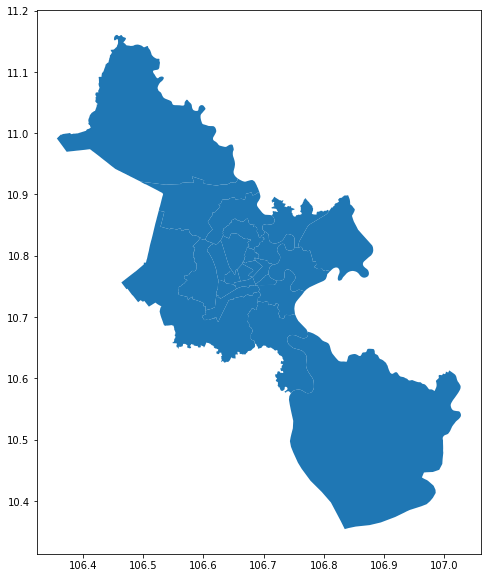

In [28]:
dataPopDistrict.to_crs(epsg=4326).plot(figsize=(10, 10))
plt.show()

In [29]:
kmeanThuDuc = kmeanThuDuc.to_crs(epsg=4326)
kmeanBinhTan = kmeanBinhTan.to_crs(epsg=4326)
kmeanBinhChanh = kmeanBinhChanh.to_crs(epsg=4326)
kmeanDistrict7 = kmeanDistrict7.to_crs(epsg=4326)
kmeanHocMon = kmeanHocMon.to_crs(epsg=4326)
kmeanDistrict9 = kmeanDistrict9.to_crs(epsg=4326)
kmeanDistrict2 = kmeanDistrict2.to_crs(epsg=4326)
kmeanDistrict12 = kmeanDistrict12.to_crs(epsg=4326)
kmeanCuChi = kmeanCuChi.to_crs(epsg=4326)
kmeanNhaBe = kmeanNhaBe.to_crs(epsg=4326)

In [30]:
dataPopDistrict= dataPopDistrict.to_crs(epsg=4326)

In [41]:
m = folium.Map(location=[10.77, 106.59], zoom_start=10, tiles='CartoDB positron')
for _, r in dataPopDistrict.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [42]:
from folium import plugins
def getonMap(data):
  heat_data = [(point.y, point.x) for point in data.geometry]
  plugins.HeatMap(heat_data).add_to(m)
getonMap(kmeanBinhTan)
getonMap(kmeanNhaBe)
getonMap(kmeanDistrict12)
getonMap(kmeanDistrict2)
getonMap(kmeanDistrict7)
getonMap(kmeanDistrict9)
getonMap(kmeanThuDuc)
getonMap(kmeanHocMon)
getonMap(kmeanBinhChanh)
getonMap(kmeanCuChi)
m

#solution 1:sử dụng api-request để tải hình về máy

In [ ]:
pathHTMLFile = '/content/input_file.html'
pathImgFile = '/content/map.png'

In [ ]:
file = open(pathHTMLFile,"w")
html = m._repr_html_()

html = html.replace('<div style="width:100%">','<div style="width:100%">')
file.write(html)
file.close()

In [ ]:
import cloudmersive_convert_api_client
from cloudmersive_convert_api_client.rest import ApiException
config = cloudmersive_convert_api_client.Configuration()
config.api_key['Apikey'] = ''
api_instance = cloudmersive_convert_api_client.ConvertDocumentApi(cloudmersive_convert_api_client.ApiClient(config))
try:
  m.save('input_file.html')
  api_reponse = api_instance.convert_document_html_to_png('input_file.html')
  !curl {api_reponse.png_result_pages[0].url} > 'map.png'
except ApiException as e: print('Exception when calling ConvertDocumentApi->convertDocument_html_to_png: %s\n' %e)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  615k  100  615k    0     0  2359k      0 --:--:-- --:--:-- --:--:-- 2359k


#solution 2: 

In [43]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
mapFname = 'output.html'
m.save(mapFname)
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=mapFname)
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)
# Path sampleFile = Paths.get("o.html");
driver.get(tmpurl);
time.sleep(5)
driver.save_screenshot('/content/map.png')
driver.quit()

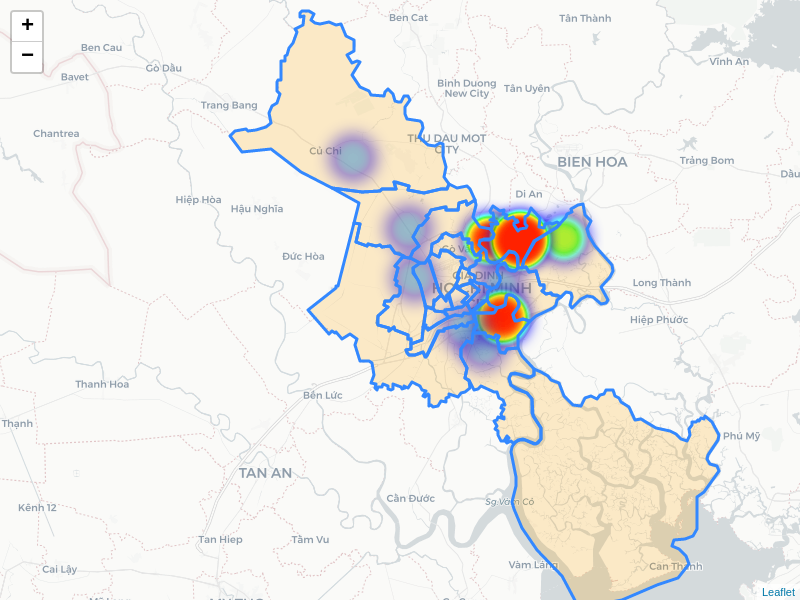

In [44]:
map = cv2.imread('/content/map.png')
cv2_imshow(map)